# Final Project 602

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from scipy import sparse
from sklearn.metrics import silhouette_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score,f1_score,recall_score
from sklearn.model_selection import cross_validate
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier





# Introduction

1. The dataset comprises of 5,000,000 entries organized into 14 columns, each representing different attributes of individuals.


2. These attributes include:

---> Demographic information such as age, gender, race, marital status, and country of origin.      

---> Employment-related features encompass work class, occupation, education level, and the number of hours worked per week.

---> Financial aspects are captured through variables like capital gains and losses. 

---> The 'fnlwgt' column appears to be a weighting factor used in survey sampling. 


3. The dataset provides a comprehensive snapshot of individuals' characteristics, making it suitable for tasks related to demographic analysis, employment trends, and potentially predicting income levels.

4. Predictions are made on whether an individual is capable of having an income of $50K per year.

## Loading the training datasets

In [2]:
#Read the file from the path specified
file_path_1 = r'C:\Users\sreya\Downloads\final_train_X\final_train_X'

# Use read_csv with the delimeter ',' as per the file given
X_train = pd.read_csv(file_path_1, delimiter=',')  

X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,Private,147548,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40,United-States
1,48,Private,195491,HS-grad,9.0,Divorced,Sales,Not-in-family,White,Female,0.0,0.0,30,United-States
2,43,Self-emp-not-inc,198096,Masters,14.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,60,United-States
3,18,Private,280603,11th,7.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,30,United-States
4,30,Private,36383,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40,Mexico


In [3]:
#Read the file from the path specified
file_path_2 = r'C:\Users\sreya\Downloads\final_train_y_dont_use\final_train_y_dont_use'

# Use read_csv with the delimeter ',' as per the file given
y_train = pd.read_csv(file_path_2, delimiter=',')

y_train.head()

,class
0,0
1,0
2,0
3,0
4,1


In [4]:
print("The shape of X_train in the given dataset:", X_train.shape)
print("The shape of y_train in the given dataset:", y_train.shape)

The shape of X_train in the given dataset: (5000000, 14)
The shape of y_train in the given dataset: (5000000, 1)


## Loading the testing datasets

In [5]:
#Read the file from the path specified
file_path_1 = r'C:\Users\sreya\Downloads\final_X_test\final_X_test'

file_path_2 = r'C:\Users\sreya\Downloads\final_y_test\final_y_test'


# Use read_csv with the delimeter ',' as per the file given
X_test = pd.read_csv(file_path_1, delimiter=',')  

# Use read_csv with the delimeter ',' as per the file given
y_test = pd.read_csv(file_path_2, delimiter=',')  

print("The shape of X_test in the given dataset:", X_test.shape)
print("The shape of y_test in the given dataset:", y_test.shape)


The shape of X_test in the given dataset: (30000, 14)
The shape of y_test in the given dataset: (30000, 1)


# Exploratory Data Analysis (EDA)

### Data Preprocessing 

In [6]:
#The information about the columns, datatypes of each column is given by

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   age             int64  
 1   workclass       object 
 2   fnlwgt          int64  
 3   education       object 
 4   education_num   float64
 5   marital_status  object 
 6   occupation      object 
 7   relationship    object 
 8   race            object 
 9   sex             object 
 10  capital_gain    float64
 11  capital_loss    float64
 12  hours_per_week  int64  
 13  native_country  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 534.1+ MB


In [7]:
# The satistical information of numerical columns in the dataset is given by

X_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,5.000000e+06,5.000000e+06,4.950213e+06,4.949709e+06,4.949888e+06,5.000000e+06
mean,3.856893e+01,1.897880e+05,1.008112e+01,1.079474e+03,8.728547e+01,4.042488e+01
std,1.363700e+01,1.056371e+05,2.572309e+00,7.389068e+03,4.028265e+02,1.234725e+01
min,1.700000e+01,1.228500e+04,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.800000e+01,1.177980e+05,9.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01
50%,3.700000e+01,1.783560e+05,1.000000e+01,0.000000e+00,0.000000e+00,4.000000e+01
75%,4.800000e+01,2.372720e+05,1.200000e+01,0.000000e+00,0.000000e+00,4.500000e+01
max,9.000000e+01,1.484705e+06,1.600000e+01,9.999900e+04,4.356000e+03,9.900000e+01


In [8]:
# Check for null values in the dataset

X_train.isnull().sum()

age                   0
workclass         50398
fnlwgt                0
education         50396
education_num     49787
marital_status    50208
occupation        49637
relationship      49929
race              50070
sex               50066
capital_gain      50291
capital_loss      50112
hours_per_week        0
native_country    49765
dtype: int64

In [9]:
#Dropping the duplicated values as they are negligable compared to the entire dataset

X_train=X_train.drop_duplicates()

print("The shape of X_train in the given dataset:", X_train.shape)

The shape of X_train in the given dataset: (327098, 14)


In [10]:
#Defining the numerical and categorical features of the dataset

X_train=X_train.sample(50000)

numerical_features = X_train.select_dtypes(include=['int64', 'float64'])

categorical_features = X_train.select_dtypes(include=['object'])

numerical_features

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
1792255,27,129661,11.0,0.0,0.0,40
3539558,47,232628,9.0,0.0,0.0,40
1890098,43,233130,9.0,0.0,0.0,20
1346010,75,316119,10.0,0.0,NaN,8
3743950,22,119838,10.0,NaN,0.0,10
...,...,...,...,...,...,...
1301475,34,183811,10.0,0.0,0.0,40
2583555,29,186733,9.0,0.0,0.0,50
2138481,42,223934,12.0,0.0,0.0,40
2487430,22,46561,11.0,NaN,0.0,40


In [11]:
categorical_features

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
1792255,NaN,Assoc-voc,Married-civ-spouse,?,Wife,Amer-Indian-Eskimo,Female,United-States
3539558,Private,HS-grad,Married-civ-spouse,Craft-repair,NaN,Black,Male,United-States
1890098,Private,HS-grad,Divorced,NaN,Not-in-family,White,Male,United-States
1346010,Private,Some-college,Widowed,Prof-specialty,Not-in-family,White,Female,United-States
3743950,State-gov,Some-college,Never-married,Other-service,Own-child,White,Male,United-States
...,...,...,...,...,...,...,...,...
1301475,Private,Some-college,Never-married,Handlers-cleaners,Not-in-family,White,Male,NaN
2583555,Private,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
2138481,Private,Assoc-acdm,Divorced,Exec-managerial,Unmarried,White,Female,NaN
2487430,Private,Assoc-voc,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States


## Distribution of the dataset

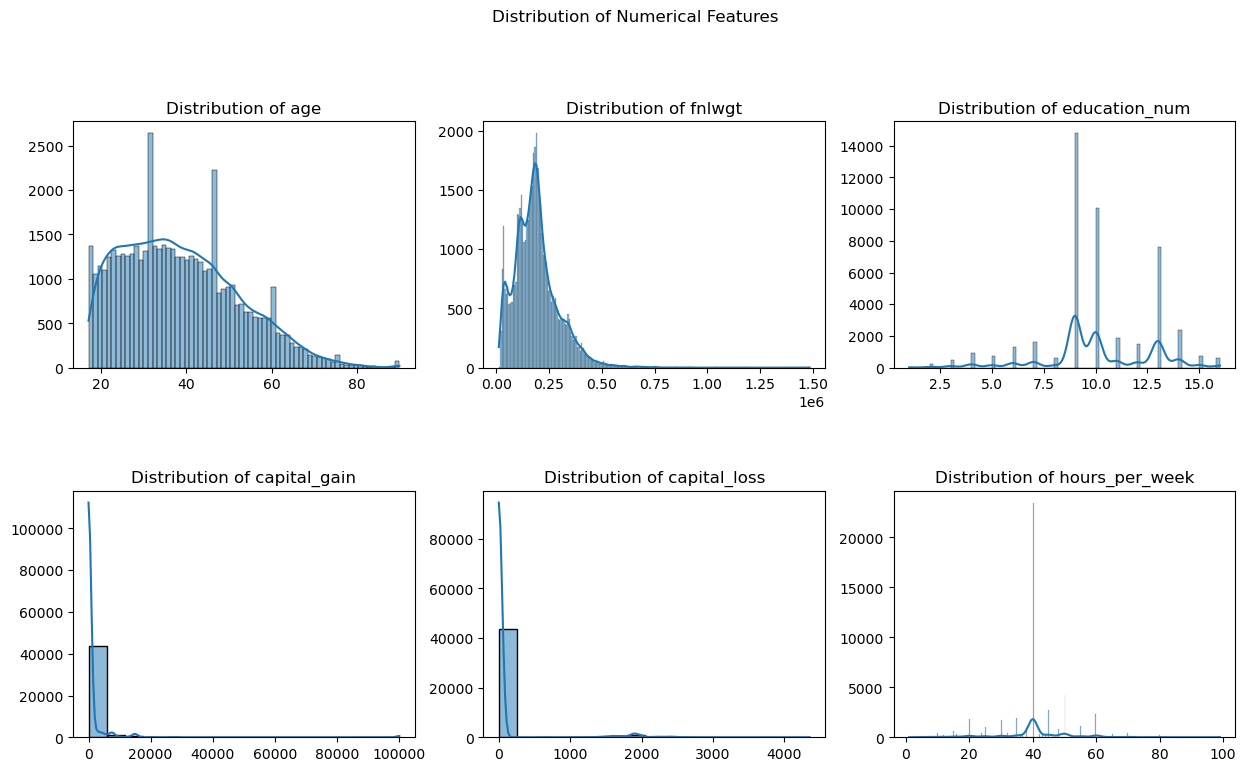

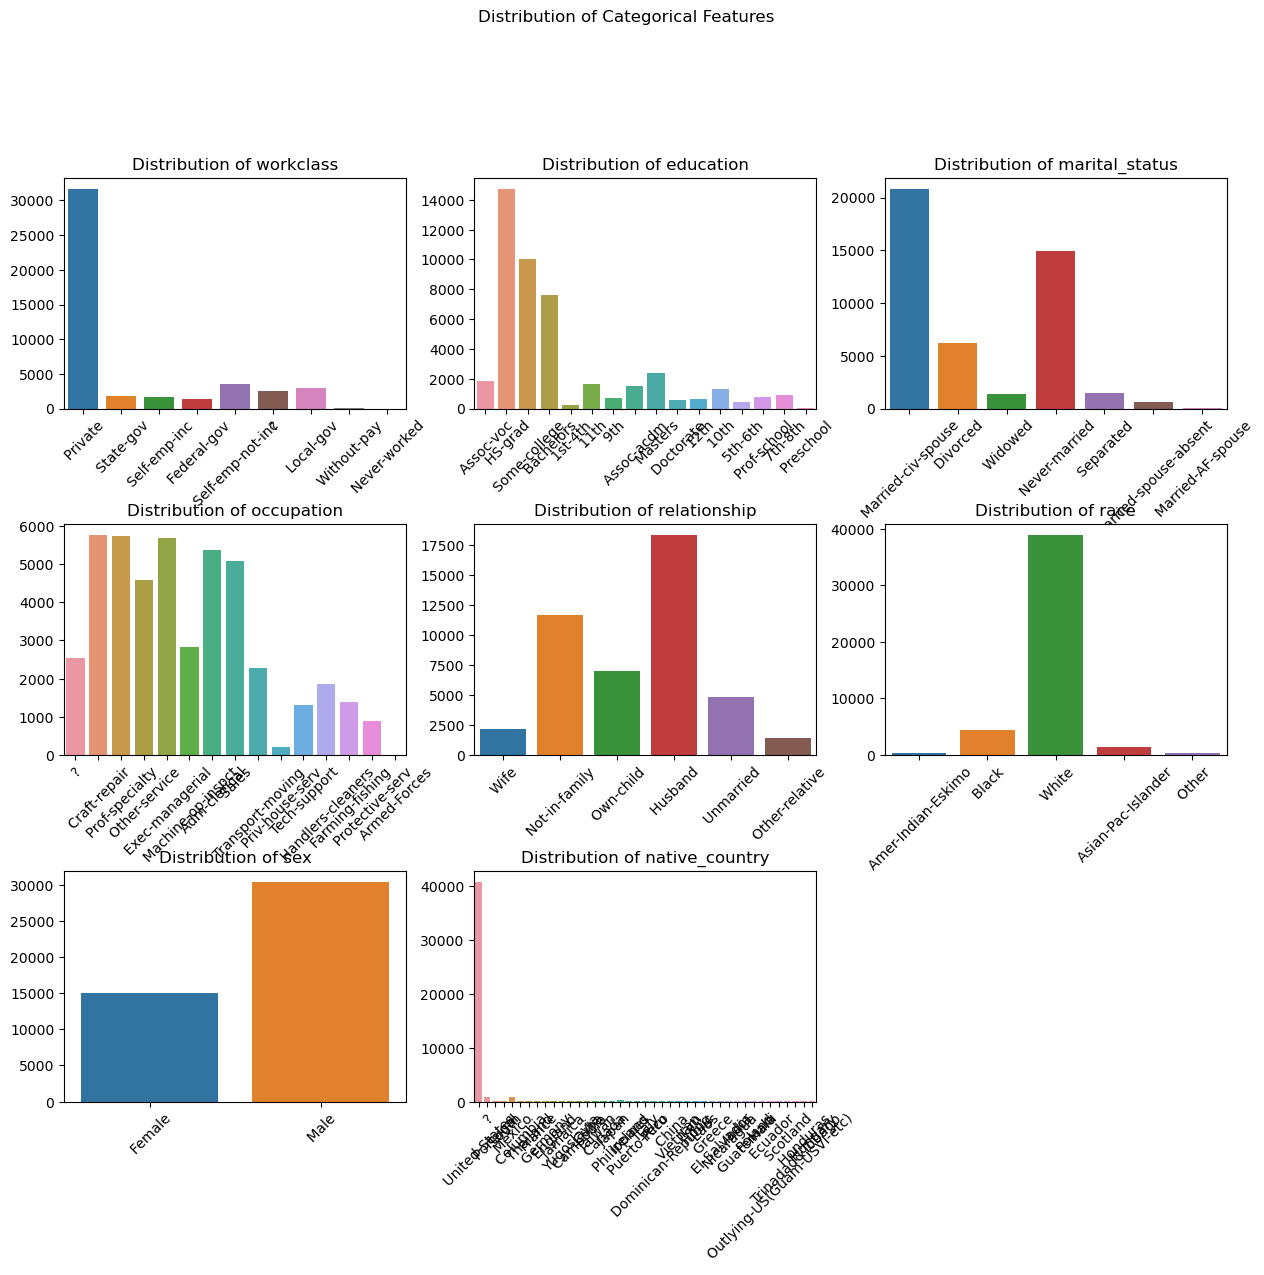

In [12]:
# Set the number of subplots
subplots_numeric = 3
numeric_rows = (numerical_features.shape[1] - 1) // subplots_numeric + 1

# The subplots for numerical features of the dataset
fig_numeric, axes_numeric = plt.subplots(numeric_rows, subplots_numeric, figsize=(15, 4 * numeric_rows))
fig_numeric.suptitle('Distribution of Numerical Features', y=1.02)
fig_numeric.subplots_adjust(hspace=0.5)

# Flatten the axes array for easier indexing
axes_numeric = axes_numeric.flatten()

for i, feature in enumerate(numerical_features.columns):
    sns.histplot(data=X_train, x=feature, kde=True, ax=axes_numeric[i])
    axes_numeric[i].set_title(f'Distribution of {feature}')
    axes_numeric[i].set_xlabel('')
    axes_numeric[i].set_ylabel('')

for i in range(len(numerical_features.columns), len(axes_numeric)):
    fig_numeric.delaxes(axes_numeric[i])

# Set the number of subplots
subplots_categorical = 3
categorical_rows = (categorical_features.shape[1] - 1) // subplots_categorical + 1

# The subplots for categorical features of the dataset
fig_categorical, axes_categorical = plt.subplots(categorical_rows, subplots_categorical, figsize=(15, 4 * categorical_rows))
fig_categorical.suptitle('Distribution of Categorical Features', y=1.02)
fig_categorical.subplots_adjust(hspace=0.5)

axes_categorical = axes_categorical.flatten()

for i, feature in enumerate(categorical_features.columns):
    sns.countplot(data=X_train, x=feature, ax=axes_categorical[i])
    axes_categorical[i].set_title(f'Distribution of {feature}')
    axes_categorical[i].set_xlabel('')
    axes_categorical[i].set_ylabel('')
    axes_categorical[i].tick_params(axis='x', rotation=45)

for i in range(len(categorical_features.columns), len(axes_categorical)):
    fig_categorical.delaxes(axes_categorical[i])

plt.show()


In [13]:
# Distribution of the y_train

y_train.value_counts()

class
0        3795712
1        1204288
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

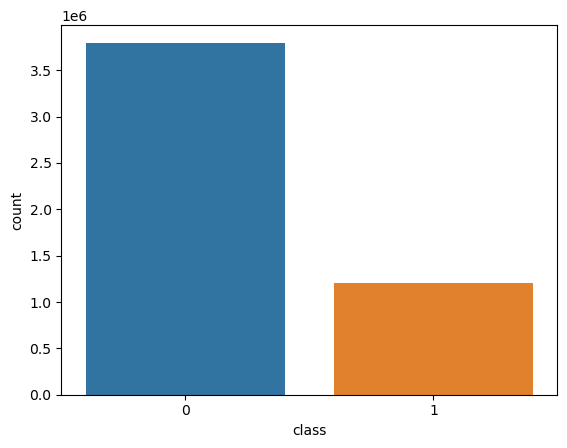

In [14]:
sns.countplot(y_train,x='class')



#### Removal of Unnecessary columns post EDA

In [15]:
#From the EDA, it is observed that native_country, education are not necessary for analysing the predictions.

X_train=X_train.drop(['native_country','education'], axis=1)


In [16]:

X_test=X_test.drop(['native_country','education'], axis=1)

X_test

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,53,State-gov,33795,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40
1,54,Federal-gov,147629,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298,0,35
2,38,Private,149347,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40
3,33,Private,152744,10,Never-married,Exec-managerial,Own-child,Asian-Pac-Islander,Female,0,0,40
4,54,Private,141272,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,42,Self-emp-not-inc,111971,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45
29996,59,Local-gov,221417,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40
29997,42,Private,227065,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,60
29998,32,Private,242654,10,Divorced,Sales,Unmarried,Black,Female,0,1138,40


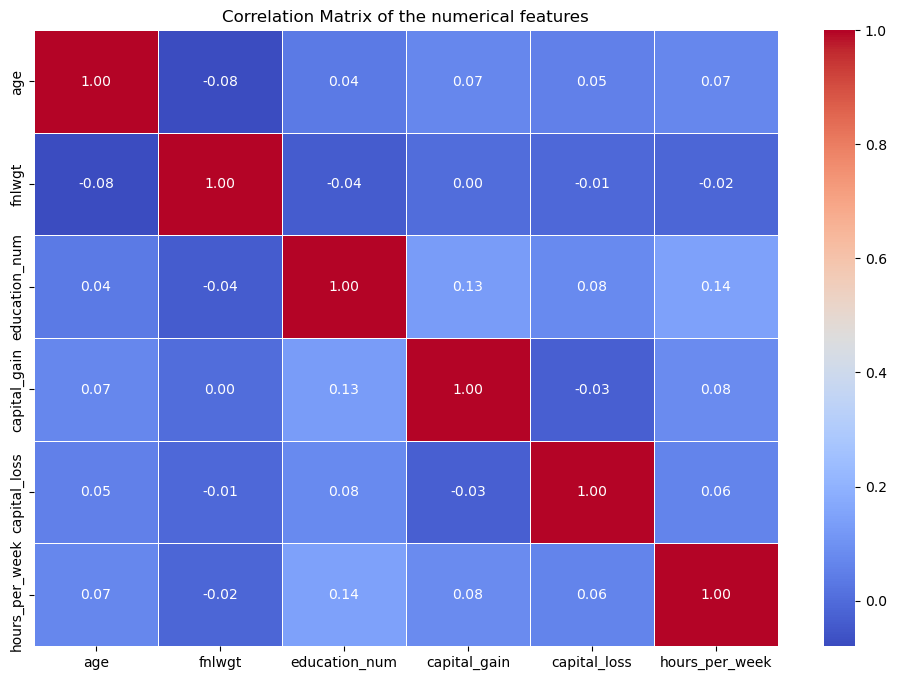

In [17]:
#Perform the correlation between the numerical features of the X_train

correlation_matrix = numerical_features.corr()

# Plotting the correlation matrix as a heatmap

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix of the numerical features')

plt.show()

# Feature Engineering

In [18]:
#Defining the numerical and categorical features of the modified X_train
numerical_features = X_train.select_dtypes(include=['int64', 'float64'])
categorical_features = X_train.select_dtypes(include=['object'])

#Using mean for the numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#Using most frequent for the categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer_cat', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



In [19]:
#Preprocessing the values using the column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features.columns),
        ('cat', categorical_transformer, categorical_features.columns)
    ])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer_num',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['workclass', 'marital_status', 'occupation', 'relationship', 'race',
       'sex'],
      dtype='object'))])

##### Handling missing values and standardizing the values of numerical features
Missing values in numerical columns are replaced with the mean of each column, 
and the values are then standardized using the StandardScaler.

##### Handling missing values and converting the categorical values to numericals of categorical features
Missing values in categorical columns are filled with the most frequent value in each column, 
and categorical variables are converted to binary using one-hot encoding. 

In [20]:
#Fit the preprocessor to the X_train dataset

X_train_processed = preprocessor.fit_transform(X_train)

#Fit the preprocessor to the X_test dataset

X_test_processed = preprocessor.fit_transform(X_test)


In [21]:
# Extract feature names after transformation
feature_names = (
    numerical_features.columns.tolist() +
    list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features.columns))
)

X_train_processed_array = (
    X_train_processed.toarray() 
    if isinstance(X_train_processed, (sparse.csr_matrix, sparse.csc_matrix)) 
    else X_train_processed
)

# Create a DataFrame with the transformed data and feature names
X_train = pd.DataFrame(X_train_processed_array, columns=feature_names)

# Display the processed DataFrame
X_train

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,-0.851172,-0.568950,0.374426,-0.154154,-0.227241,-0.044110,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.617174,0.402469,-0.441817,-0.154154,-0.227241,-0.044110,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.323505,0.407205,-0.441817,-0.154154,-0.227241,-1.651866,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2.672858,1.190146,-0.033696,-0.154154,0.000000,-2.616519,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-1.218259,-0.661623,-0.033696,0.000000,-0.227241,-2.455744,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.337251,-0.058084,-0.033696,-0.154154,-0.227241,-0.044110,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
49996,-0.704338,-0.030517,-0.441817,-0.154154,-0.227241,0.759767,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
49997,0.250087,0.320448,0.782547,-0.154154,-0.227241,-0.044110,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
49998,-1.218259,-1.352939,0.374426,0.000000,-0.227241,-0.044110,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [22]:
X_test_processed_array = (
    X_test_processed.toarray() 
    if isinstance(X_test_processed, (sparse.csr_matrix, sparse.csc_matrix)) 
    else X_test_processed
)

# Create a DataFrame with the transformed data and feature names
X_test = pd.DataFrame(X_test_processed_array, columns=feature_names)

# Display the processed DataFrame
X_test

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,1.027327,-1.457489,-0.415936,-0.142956,-0.225993,-0.036638,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.099347,-0.391391,1.511476,0.811783,-0.225993,-0.437583,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.052978,-0.375302,-0.415936,-0.142956,-0.225993,-0.036638,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.413080,-0.343487,-0.030453,-0.142956,-0.225993,-0.036638,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.099347,-0.450927,-0.415936,-0.142956,-0.225993,-0.036638,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.235103,-0.725342,-0.415936,-0.142956,-0.225993,0.364306,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29996,1.459449,0.299661,-0.415936,-0.142956,-0.225993,-0.036638,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29997,0.235103,0.352556,1.125994,-0.142956,-0.225993,1.567140,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29998,-0.485100,0.498553,-0.030453,-0.142956,2.536780,-0.036638,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Clustering

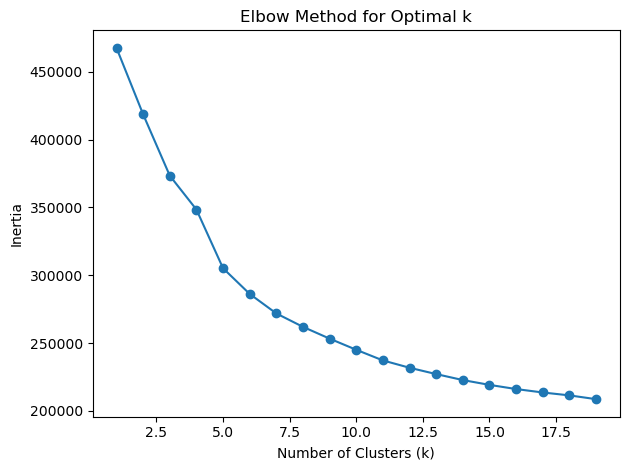

In [23]:
# Exploring what value of K might be suitable for using clustering for unsupervised learning
inertia_values = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=20)
    clusters = kmeans.fit_predict(X_train)
    inertia_values.append(kmeans.inertia_)# Calculate inertia for the Elbow Method
        
# Plot the Elbow graph with the inertia values
plt.plot(range(1, 20), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()


#### Optimal value of K

From the elbow plot, it is observed that the major bent is at the value 7, which is considered to be the good number of clusters for moving forward with the clustering algorithm for predicting the values.


## Silehouette scores for each of the clustering algorithms

### PCA for reducing the dimensions of the X_train for analysing the features

In [24]:
# Assuming k is the optimal number of clusters determined using the elbow method
k = 7

kmeans = KMeans(n_clusters=k, random_state=42,n_init=20)

clusters_kmeans = kmeans.fit_predict(X_train)

# Predict the clusters for each data point in X_train
cluster_labels = kmeans.predict(X_train)

X_train['cluster_label'] = cluster_labels

1. The processed data goes through to the KMeans clustering method with 7 clusters, and the resulting cluster labels are added to the DataFrame.
2. The data points in the X_train dataset were then clustered into 7 groups using K-Means clustering. It then calculates a score to each data point to determine how well it fits into its cluster. 

##### KMeans Clustering

In [25]:
from sklearn.metrics import silhouette_score

silhouette_avg_kmeans = silhouette_score(X_train, clusters_kmeans)

print(f"Silhouette Score for KMeans: {silhouette_avg_kmeans}")


Silhouette Score for KMeans: 0.23850301450738742


##### DBSCAN Clustering

In [26]:
dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')

clusters_dbscan = dbscan.fit_predict(X_train)

silhouette_avg_dbscan = silhouette_score(X_train, clusters_dbscan)

print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan}")





Silhouette Score for DBSCAN: -0.5503727500904234


### Scores of clustering algorithms.

1. Of all the clustering algorithms and observing the sillehoutes scores of each algorithm, it can be conclused that KMeans clustering gives the highest score of all.
2. KMeans is suitable for proceeding with the model creation and predicting the values accordingly.

## Building the Model

### Splitting the data into testing and training

In [27]:
# Add the cluster labels to the DataFrame
X_train['cluster_label'] = cluster_labels

In [28]:
median_value = np.median(X_train['cluster_label'])

# Set threshold based on the median
threshold = median_value

def map_to_labels(cluster_value, threshold):
    if cluster_value < threshold:
        return 0
    else:
        return 1

mapped_labels = [map_to_labels(value, threshold) for value in X_train['cluster_label']]

# Add the cluster labels to the DataFrame
X_train['cluster_label'] = mapped_labels

In [29]:
# Split the data into training and testing by choosing cluster label as the target variable
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train.drop(['cluster_label'], axis=1),
                                                    X_train['cluster_label'], test_size=0.2, random_state=42)



### Classification Models

### Random Forest Classifier

In [30]:
# Build a random forest classifier

classifier_rf = RandomForestClassifier(random_state=42)

classifier_rf.fit(X_train1, y_train1)

predictions_rf = classifier_rf.predict(X_test)

In [31]:
# Classification Report of the Random forest classifier

accuracy_rf = accuracy_score(y_test, predictions_rf)
precision_rf = precision_score(y_test, predictions_rf, average='macro')
f1_score_rf = f1_score(y_test, predictions_rf, average='macro')
recall_score_rf = recall_score(y_test, predictions_rf, average='macro')


print(f'Accuracy with RandomForestClassifier without hyperparameters: {accuracy_rf}')

print(f'Precision with RandomForestClassifier without hyperparameters: {precision_rf}')

print(f'F1 Score with RandomForestClassifier without hyperparameters: {f1_score_rf}')

print(f'Recall with RandomForestClassifier without hyperparameters: {recall_score_rf}')

Accuracy with RandomForestClassifier without hyperparameters: 0.42083333333333334
Precision with RandomForestClassifier without hyperparameters: 0.5619764291926994
F1 Score with RandomForestClassifier without hyperparameters: 0.42055203001500685
Recall with RandomForestClassifier without hyperparameters: 0.5657821391243758


In [32]:
#CV Scores
cv_score_values_rf = cross_val_score(classifier_rf, X_test, y_test, cv=5, scoring='accuracy')

print(f'Cross Validation Scores with RandomForestClassifier without hyperparameters:\n {cv_score_values_rf}')

print("Average Score:", np.mean(cv_score_values_rf))

print("Standard Deviation of Scores:", np.std(cv_score_values_rf))

C:\Users\sreya\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sreya\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sreya\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sreya\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Cross Validation Scores with RandomForestClassifier without hyperparameters:
 [0.96616667 0.967      0.966      0.97116667 0.96416667]
Average Score: 0.9669000000000001
Standard Deviation of Scores: 0.002325224003546039


### Support Vector Machine Classifier

In [33]:
# Build a Support Vector Machine (SVM) classifier
svm_classifier = Pipeline([
    ('svm_classifier', SVC(random_state=42))
])

svm_classifier.fit(X_train1, y_train1)

predictions_svm = svm_classifier.predict(X_test)


In [34]:
# Classification Report of the Support Vector Machine classifier

accuracy_svm = accuracy_score(y_test, predictions_svm)
precision_svm = precision_score(y_test, predictions_svm, average='macro')
f1_score_svm = f1_score(y_test, predictions_svm, average='macro')
recall_score_svm = recall_score(y_test, predictions_svm, average='macro')


print(f'Accuracy with Support Vector Machine Classifier without hyperparameters: {accuracy_svm}')

print(f'Precision with Support Vector Machine Classifier without hyperparameters: {precision_svm}')

print(f'F1 Score with Support Vector Machine Classifier without hyperparameters: {f1_score_svm}')

print(f'Recall with Support Vector Machine Classifier without hyperparameters: {recall_score_svm}')

Accuracy with Support Vector Machine Classifier without hyperparameters: 0.4257666666666667
Precision with Support Vector Machine Classifier without hyperparameters: 0.563514621535868
F1 Score with Support Vector Machine Classifier without hyperparameters: 0.42532146639934476
Recall with Support Vector Machine Classifier without hyperparameters: 0.5683847533516562


In [35]:
#CV Scores
cv_score_values_svm = cross_val_score(svm_classifier, X_test, y_test, cv=5, scoring='accuracy')

print(f'Cross Validation Scores with Support Vector Machine Classifier without hyperparameters:\n {cv_score_values_svm}')

print("Average Score:", np.mean(cv_score_values_svm))

print("Standard Deviation of Scores:", np.std(cv_score_values_svm))

C:\Users\sreya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Cross Validation Scores with Support Vector Machine Classifier without hyperparameters:
 [0.8655     0.87083333 0.865      0.86783333 0.86316667]
Average Score: 0.8664666666666667
Standard Deviation of Scores: 0.0026423894910141995


### Logistic Regression Classifier

In [36]:
logistic_reg = LogisticRegression(max_iter=1000, random_state=42)

logistic_reg.fit(X_train1, y_train1)

predictions_lr = logistic_reg.predict(X_test)

In [37]:
# Classification Report of the Logistic Regression classifier

accuracy_lr = accuracy_score(y_test, predictions_lr)
precision_lr = precision_score(y_test, predictions_lr, average='macro')
f1_score_lr = f1_score(y_test, predictions_lr, average='macro')
recall_score_lr = recall_score(y_test, predictions_lr, average='macro')


print(f'Accuracy with Logistic Regression Classifier without hyperparameters: {accuracy_lr}')

print(f'Precision with Logistic Regression Classifier without hyperparameters: {precision_lr}')

print(f'F1 Score with Logistic Regression Classifier without hyperparameters: {f1_score_lr}')

print(f'Recall with Logistic Regression Classifier without hyperparameters: {recall_score_lr}')

Accuracy with Logistic Regression Classifier without hyperparameters: 0.4179333333333333
Precision with Logistic Regression Classifier without hyperparameters: 0.5603486035188281
F1 Score with Logistic Regression Classifier without hyperparameters: 0.4177126749045025
Recall with Logistic Regression Classifier without hyperparameters: 0.5636393464984801


In [38]:
#CV Scores
cv_score_values_lr = cross_val_score(logistic_reg, X_test, y_test, cv=5, scoring='accuracy')

print(f'Cross Validation Scores with Logistic Regression classifier without hyperparameters:\n {cv_score_values_lr}')

print("Average Score:", np.mean(cv_score_values_lr))

print("Standard Deviation of Scores:", np.std(cv_score_values_lr))

C:\Users\sreya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Cross Validation Scores with Logistic Regression classifier without hyperparameters:
 [0.85083333 0.8565     0.84716667 0.85566667 0.85116667]
Average Score: 0.8522666666666666
Standard Deviation of Scores: 0.0034279893685820136


## Hyperparameter Tuning

### Random Forest Classifier

In [ ]:
# Build a logistic regression model with hyperparameters

classifier_rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(classifier_rf, param_grid_rf, cv=5, scoring='accuracy')

grid_search_rf.fit(X_train1, y_train1.ravel())



In [ ]:
# Get the best parameters from the grid search
best_params_rf = grid_search_rf.best_params_

# Get the best estimator from the grid search
best_classifier_rf = grid_search_rf.best_estimator_

# Predict using the best classifier
predictions_rf = best_classifier_rf.predict(X_test)


In [ ]:
# Classification Report of the Logistic Regression classifier with hyperparameters

accuracy_rf = accuracy_score(y_test, predictions_rf)
precision_rf = precision_score(y_test, predictions_rf, average='macro')
f1_score_rf = f1_score(y_test, predictions_rf, average='macro')
recall_score_rf = recall_score(y_test, predictions_rf, average='macro')


print(f'Accuracy with Logistic Regression Classifier with hyperparameters: {accuracy_rf}')

print(f'Precision with Logistic Regression Classifier with hyperparameters: {precision_rf}')

print(f'F1 Score with Logistic Regression Classifier with hyperparameters: {f1_score_rf}')

print(f'Recall with Logistic Regression Classifier with hyperparameters: {recall_score_rf}')

In [ ]:
#CV Scores
cv_score_values_rf = cross_val_score(logistic_reg, X_test, y_test, cv=5, scoring='accuracy')

print(f'Cross Validation Scores with Random Forest classifier with hyperparameters:\n {cv_score_values_rf}')

print("Average Score:", np.mean(cv_score_values_rf))

print("Standard Deviation of Scores:", np.std(cv_score_values_rf))

### Conclusion

Three models have used for predicting the values: 

Logistic Regression, Support Vector Machines (SVM), and Random Forest Classifier. 

Upon modelling, The values of metrics weren't that high as the training data is too less for comparing it with the testing dataset. 

The accuracies can be taken from the mean of cross validation which also gives us the accuracies of each fold, it is observed that the accuracy score for Random Forest is around 96% which is quite high for a model to predict the values accurately.

Findings demonstrate the effectiveness of Random Forest in accurately predicting the cluster associated with target variable in our dataset. Its resilience in dealing with complicated interconnections within the data is quite good. The thorough research identifies Random Forest as the most accurate model for our predicting task. 

Our project demonstrates cleaning of data, data preprocessing, EDA, Clustering, Data Modelling and predicting the values with suitable metriculations.